# Communicate Data Findings
# Loan Data From Prosper

## Submitted By
## K.Mohammed Sharook

In [0]:
#Downloading the data using wget
!wget https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv

--2020-04-07 06:31:10--  https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.8.237
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.8.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86471101 (82M) [application/octet-stream]
Saving to: ‘prosperLoanData.csv’

prosperLoanData.csv 100%[===================>]  82.46M  34.8MB/s    in 2.4s    

2020-04-07 06:31:12 (34.8 MB/s) - ‘prosperLoanData.csv’ saved [86471101/86471101]



# Introduction
This document explores a dataset containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [0]:
#Importing requiring libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivitiy = 'all'
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')
import os
% matplotlib inline

In [0]:
#Reading the csv file
data = pd.read_csv('prosperLoanData.csv',sep=',')
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [0]:
#Shape of the data
print(f'This data has {data.shape[0]} rows and {data.shape[1]} columns')

This data has 113937 rows and 81 columns


In [0]:
#Describing the data
data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [0]:
#Info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [0]:
#For sake of exploration we can drop rows having null values
data.dropna(inplace=True)

In [0]:
#Taking only the neccesary columns
use_cols = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 'EmploymentStatus']
data = data[use_cols]
print(f'Shape of new loan data of only neccesary column :\nrows = {data.shape[0]}\ncolumns = {data.shape[1]}')

Shape of new loan data of only neccesary column :
rows = 113937
columns = 6


In [0]:
#Stripping and replaceing bad characters in column names
data.columns = [str(x).strip().replace(' ','_') for x in data.columns]

In [0]:
#Reindexing the new data
data.reset_index(drop=True,inplace=True)

In [0]:
#Sample of new data
data.sample(5)

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating_(Alpha),EmploymentStatus
68258,15200,0.11495,6579.083333,36,NaN,Full-time
102870,12500,0.26930,6299.916667,36,NaN,Full-time
112754,3000,0.30349,1446.833333,36,NaN,Self-employed
36245,20000,0.11563,10000.000000,36,A,Employed
86209,7500,0.30532,6666.666667,36,D,Employed


In [0]:
#info of the new data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   LoanOriginalAmount     113937 non-null  int64   
 1   BorrowerAPR            113912 non-null  float64 
 2   StatedMonthlyIncome    113937 non-null  float64 
 3   Term                   113937 non-null  int64   
 4   ProsperRating_(Alpha)  84853 non-null   category
 5   EmploymentStatus       111682 non-null  object  
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 4.5+ MB


Meaning of the columns names
> `LoanOriginalAmount` : The origination amount of the loan. 

> `BorrowerAPR` : The Borrower's Annual Percentage Rate (APR) for the loan.

> `StatedMonthlyIncome` : The monthly income the borrower stated at the time the listing was created.

> `Term` : The length of the loan expressed in months.

> `ProsperRating (Alpha)` : The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

> `Employment Status` : The employment status of the borrower at the time they posted the listing.


# Univariate Data Exploration

## Lets start by exploring the categroical columns

In [0]:
categorical_data = data.select_dtypes(include=['object'])
categorical_data.head()

,ProsperRating_(Alpha),EmploymentStatus
0,NaN,Self-employed
1,A,Employed
2,NaN,Not available
3,A,Employed
4,D,Employed


> `ProsperRating (Alpha)` : The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

> `Employment Status` : The employment status of the borrower at the time they posted the listing.


In [0]:
#Number of null values in each columns
columns = categorical_data.isnull().sum().index
null_count = categorical_data.isnull().sum().values

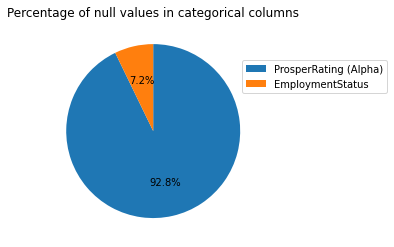

In [0]:
fig = plt.Figure()
ax = fig.add_axes([0.75,0.75,1.25,1.25])
patch,text,intext = plt.pie(null_count,autopct='%0.1f%%',startangle=90,counterclock=False)
plt.title('Percentage of null values in categorical columns',color='black');
plt.legend(patch, columns, loc="upper right",bbox_to_anchor=(1.5,0.75,0.1,0.1));

> Number of each values in `EmploymentStatus` column

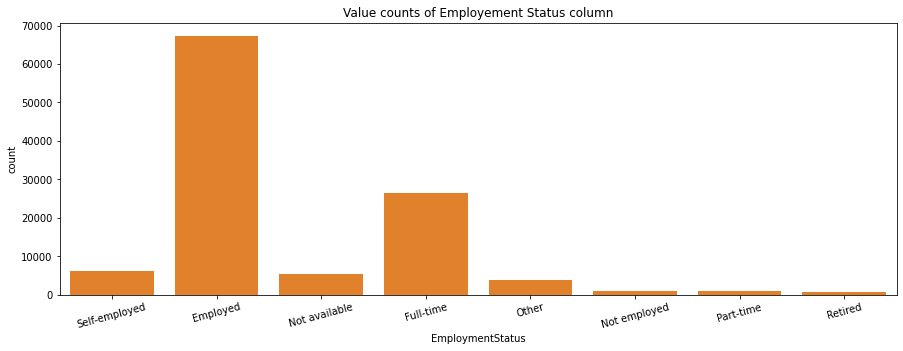

In [0]:
plt.figure(figsize=(15,5))
base_color = sns.color_palette()[1]
sns.countplot(data=categorical_data,x='EmploymentStatus',color=base_color)
_=plt.xticks(rotation=15)
_=plt.title('Value counts of Employement Status column')

From the look of above plot we can see that majority of people are employed followed by full time

> Number of each values in `ProsperRating_(Alpha)` column

Since this column is a ordinal data we need to make it in a ordinal column

In [0]:
order = ['AA','A','B','C','D','E','HR']
ordinal = pd.api.types.CategoricalDtype(ordered=True,categories=order)
data['ProsperRating_(Alpha)'] = data['ProsperRating_(Alpha)'].astype(ordinal)
categorical_data['ProsperRating_(Alpha)'] = categorical_data['ProsperRating_(Alpha)'].astype(ordinal)

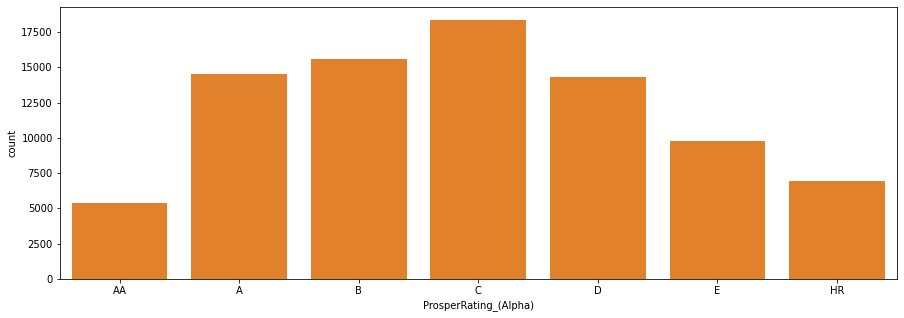

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(data=categorical_data,x='ProsperRating_(Alpha)',color=base_color)

Next we look into the term column 
We can see that it has only 3 values we can consider this as a categorical or numerical types
Here i consider this as categorical column value

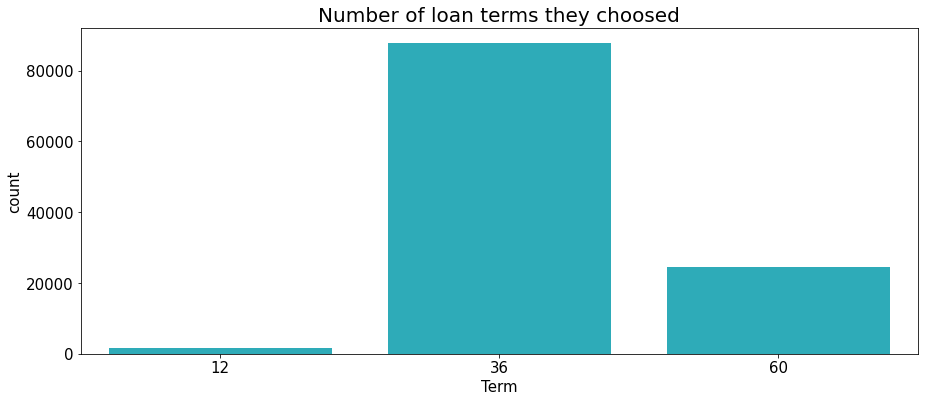

In [0]:
color = sns.color_palette()[9]
_=plt.figure(figsize=(15,6))
_=plt.title('Number of loan terms they choosed',size=20)
_=sns.countplot(data=num_data,x='Term',color=color)
_=plt.xlabel('Term',size=15)
_=plt.ylabel('count',size=15)
_=plt.yticks(size=15)
_=plt.xticks(size=15)

We can see that most of them chose 1-1/2 years term for their loan

## Lets start by exploring the Numerical columns

In [0]:
num_data = data.select_dtypes(exclude=['object','category'])
num_data.head()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term
0,9425,0.16516,3083.333333,36
1,10000,0.12016,6125.000000,36
2,3001,0.28269,2083.333333,36
3,10000,0.12528,2875.000000,36
4,15000,0.24614,9583.333333,36


Meaning of columns
> `LoanOriginalAmount` : The origination amount of the loan. 

> `BorrowerAPR` : The Borrower's Annual Percentage Rate (APR) for the loan.

> `StatedMonthlyIncome` : The monthly income the borrower stated at the time the listing was created.

> `Term` : The length of the loan expressed in months.


In [0]:
num_data['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

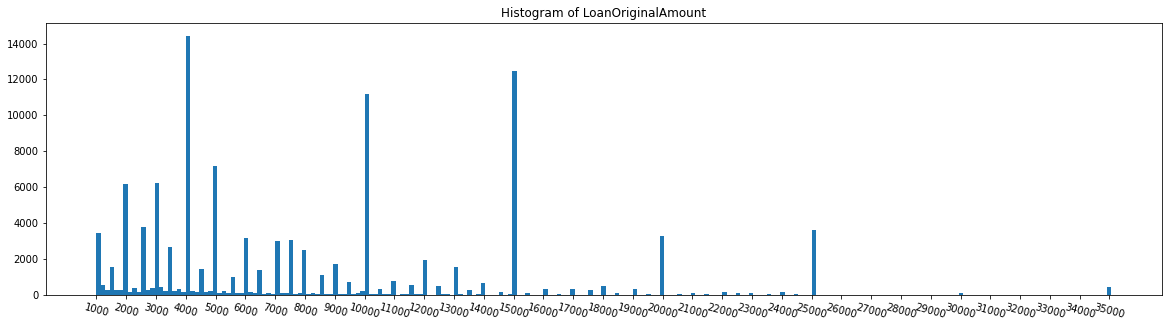

In [0]:
#Histogram of LoanOriginalAmount
plt.figure(figsize=(20,5))
_=plt.title('Histogram of LoanOriginalAmount')
bins = np.arange(num_data['LoanOriginalAmount'].min(),num_data['LoanOriginalAmount'].max()+150,150)
_=plt.hist(num_data['LoanOriginalAmount'],bins=bins)
_=plt.xticks(np.linspace(1000,35000,35),rotation=-15)

There is a spikes around 1000th value in the x values that suggest that most loan amount are multiples of 1000

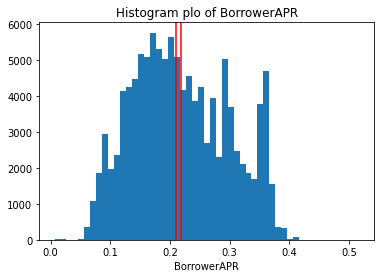

In [0]:
bins = np.arange(num_data['BorrowerAPR'].min(),num_data['BorrowerAPR'].max()+0.01,0.01)
_=plt.title('Histogram plo of BorrowerAPR')
_=sns.distplot(num_data['BorrowerAPR'],kde=False,bins=bins,hist_kws={'alpha':1})
_=plt.axvline(x=num_data['BorrowerAPR'].mean(),color='red')
_=plt.axvline(x=num_data['BorrowerAPR'].median(),color='red')

Here we can see that since the red color shows the mean and median value of the column and it is almost same so it suggest that data is distributed normally

Now we look at the Monthly Income of the people when they applied for loan

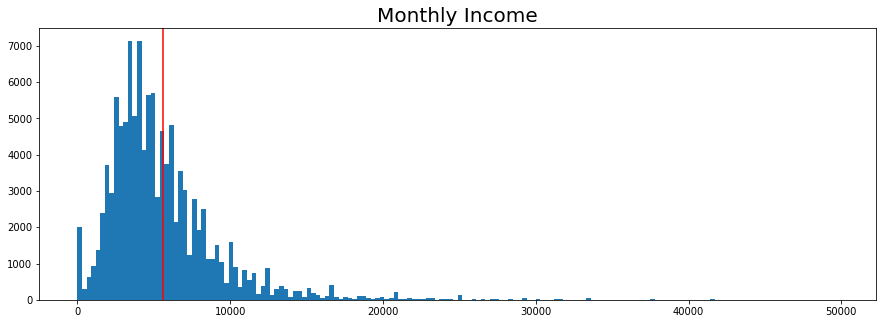

In [0]:
bins = np.arange(0, 50000, 300)
plt.figure(figsize=(15,5))
_=plt.title('Monthly Income',size=20);
plt.hist(num_data['StatedMonthlyIncome'], bins=bins);
_= plt.axvline(x=num_data['StatedMonthlyIncome'].mean(),color='red')

>We can see that the everyone who applied for loan their majority income in below 10k.

>Since its mostly right skewed

>The red line shows us the mean income value

# Bivariate Exploration

Here in bivariate exploration we explore the relationship  of two variables


> We can find the relationship b/w the different `EmploymentStatus` and the Loan amount they bought(`LoanOriginalAmount`) 

In [0]:
ax.patches[1].get_height()

6194.779017264276

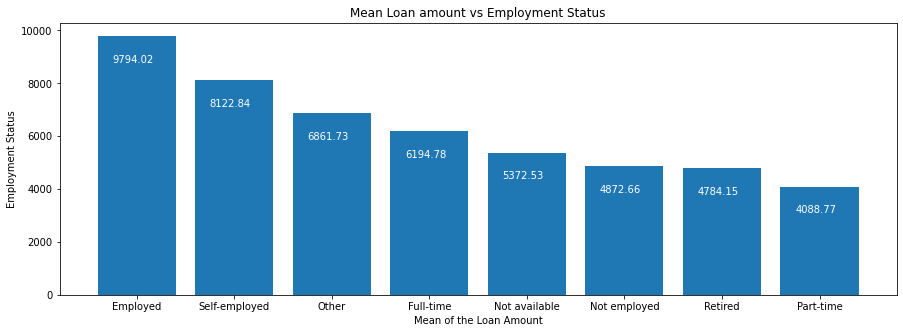

In [0]:
plt.figure(figsize=(15,5))
mean_amt = data.groupby('EmploymentStatus')['LoanOriginalAmount'].mean().reset_index(drop=False).sort_values(by='LoanOriginalAmount',ascending=False)
ax = plt.bar(mean_amt['EmploymentStatus'],mean_amt['LoanOriginalAmount'])
plt.xlabel('Mean of the Loan Amount');
plt.ylabel('Employment Status');
plt.title('Mean Loan amount vs Employment Status');
for a in ax.patches:
  plt.text(x=np.round(a.get_x()+0.15,2),y=np.round(a.get_height()-1000,2),s=str(np.round(a.get_height(),2)),color='white')

Here we can see that Employed people takes more amount of loan because they can afford to repay the loan they bought

> Relationship between `StatedMonthlyIncome` and `LoanOriginalAmount`

In [0]:
def set_figsize(a,b):
  return plt.figure(figsize=(a,b))

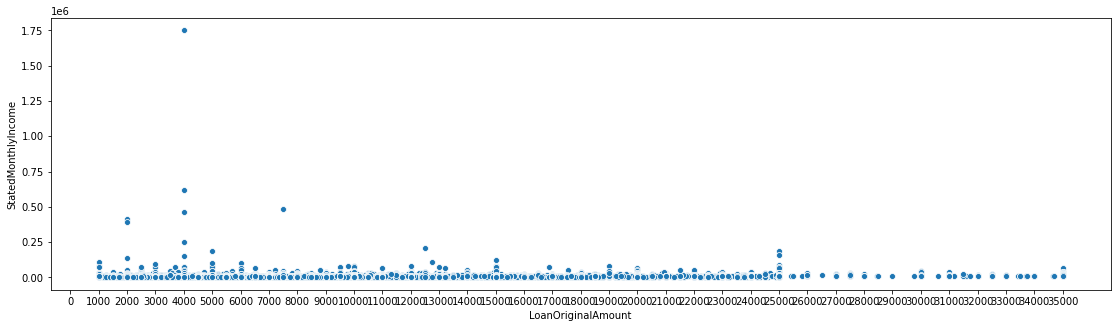

In [0]:
set_figsize(19,5)
sns.scatterplot(data=data,x='LoanOriginalAmount',y='StatedMonthlyIncome')
plt.xticks(np.linspace(0,35000,36));

> Relationship between `Term` and `LoanOriginalAmount`

Theoritically when we take a large amount of loan we need to have more time to repay the loan
Lets find the relationship between them

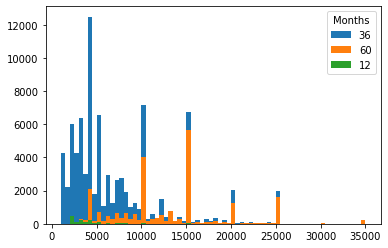

In [0]:
bins = np.arange(data.LoanOriginalAmount.min(),data.LoanOriginalAmount.max()+500,500)
for x in data.Term.unique():
  _=plt.hist(data[data['Term'] == x]['LoanOriginalAmount'],label=x,bins=bins)
_=plt.legend(title='Months')

But here we see that large amount of data took mostly 36 months to repay.I think this is because their employment status they took more time to repay
We can find this relation in Mutivariate Exploration

Box plots of categorical vs numeric columns
(with seaborn pairgrid)

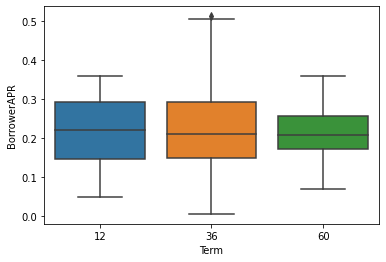

In [0]:
#Term vs BorrowerAPR columns
cols = ['Term','BorrowerAPR']
sns.boxplot(data[cols[0]],data[cols[1]])

We can see that they have same mean values but they differ in the range.They charge more APR for terms that in 36 months

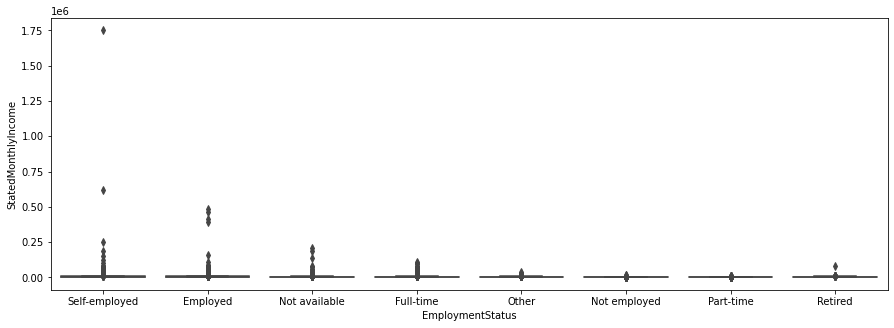

In [0]:
#EmploymentStatus vs StatedMonthlyIncome columns
set_figsize(15,5)
cols = ['EmploymentStatus','StatedMonthlyIncome']
sns.boxplot(data[cols[0]],data[cols[1]],color=color)

Here this suggest that self-employed have the most outliers 
Sometimes that is because they are multimillionare or something..Even if they are why did they took loan


Relationship b/w `LoanOriginalAmount` and `BorrowerAPR`

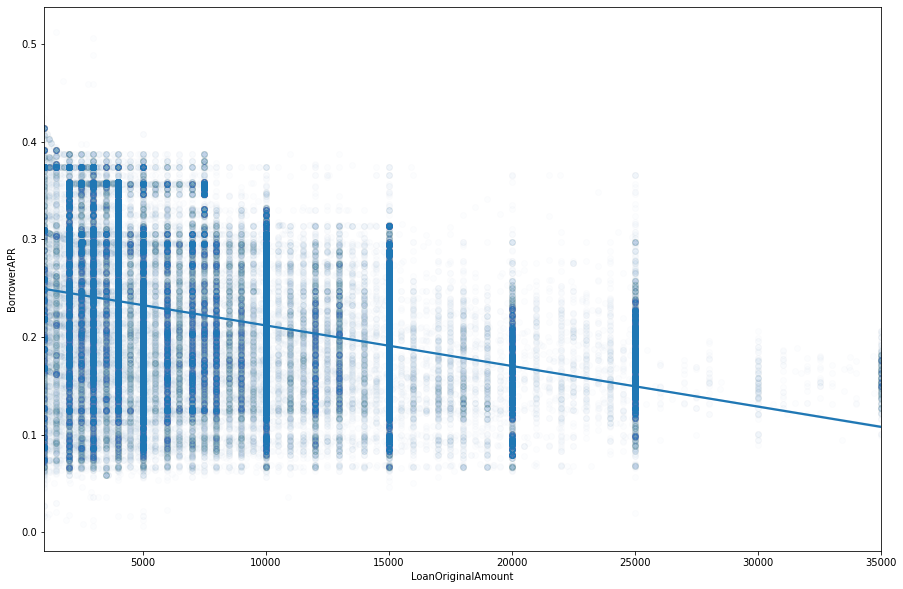

In [0]:
set_figsize(15,10)
sns.regplot(data = data, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});

From the regplot it is negative correlated with each other
That seems therotical that more the amount the less return rate provided by the data

# Multivariate Exploration

> Here we answer the most important question
that why huge `LoanOriginalAmount` took only 36 months to repay and less amount took 60 months to repay
We can analyse with their `EmploymentStatus` and `StatedMonthlyIncome`

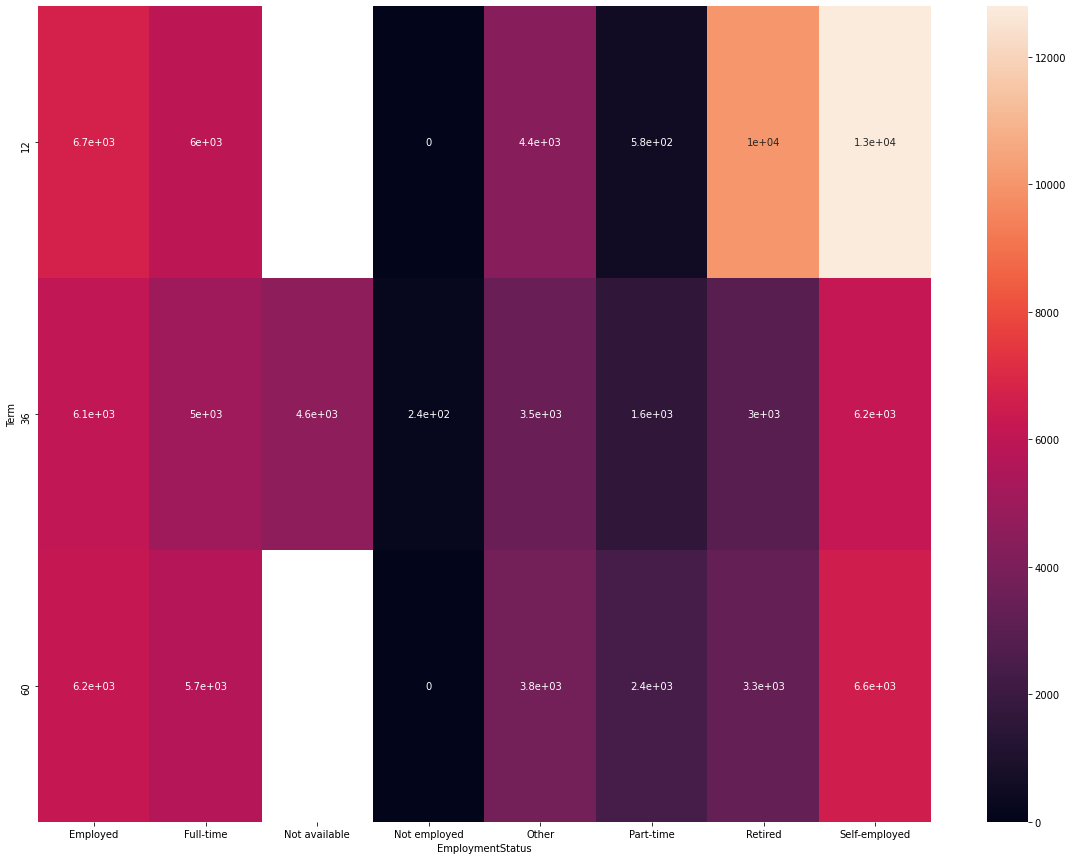

In [433]:
set_figsize(20,15)
heat = data.groupby(['Term','EmploymentStatus'])['StatedMonthlyIncome'].mean().reset_index().pivot(index='Term',columns='EmploymentStatus',values='StatedMonthlyIncome')
sns.heatmap(heat,annot=True)

Yes From the heat map we can see that lower income people took more time to repay.We can get it clearly from `StatedMonthlyIncome`